In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv("AutoInsurance - AutoInsurance.csv")

In [3]:
df.sample(2)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
6288,SM54927,Washington,6739.664992,No,Extended,Bachelor,1/26/11,Unemployed,F,0,Rural,Married,93,34,32,0,9,Personal Auto,Personal L2,Offer1,Call Center,13.073952,Four-Door Car,Medsize
9046,XD54132,California,2567.346739,No,Basic,High School or Below,6/2/2011,Employed,F,61900,Suburban,Single,64,11,64,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,307.200000,Four-Door Car,Medsize


In [4]:
df.shape

(9134, 24)

In [5]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [6]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe(include="all")

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,BU79786,California,NaN,No,Basic,Bachelor,10/1/2011,Employed,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,5779,5298,NaN,NaN,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,NaN,NaN,93.219291,15.097000,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,NaN,NaN,34.407967,10.073257,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,NaN,NaN,83.000000,14.000000,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,NaN,NaN,109.000000,23.000000,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


### Univariate Analysis

In [9]:
df.select_dtypes("object").columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

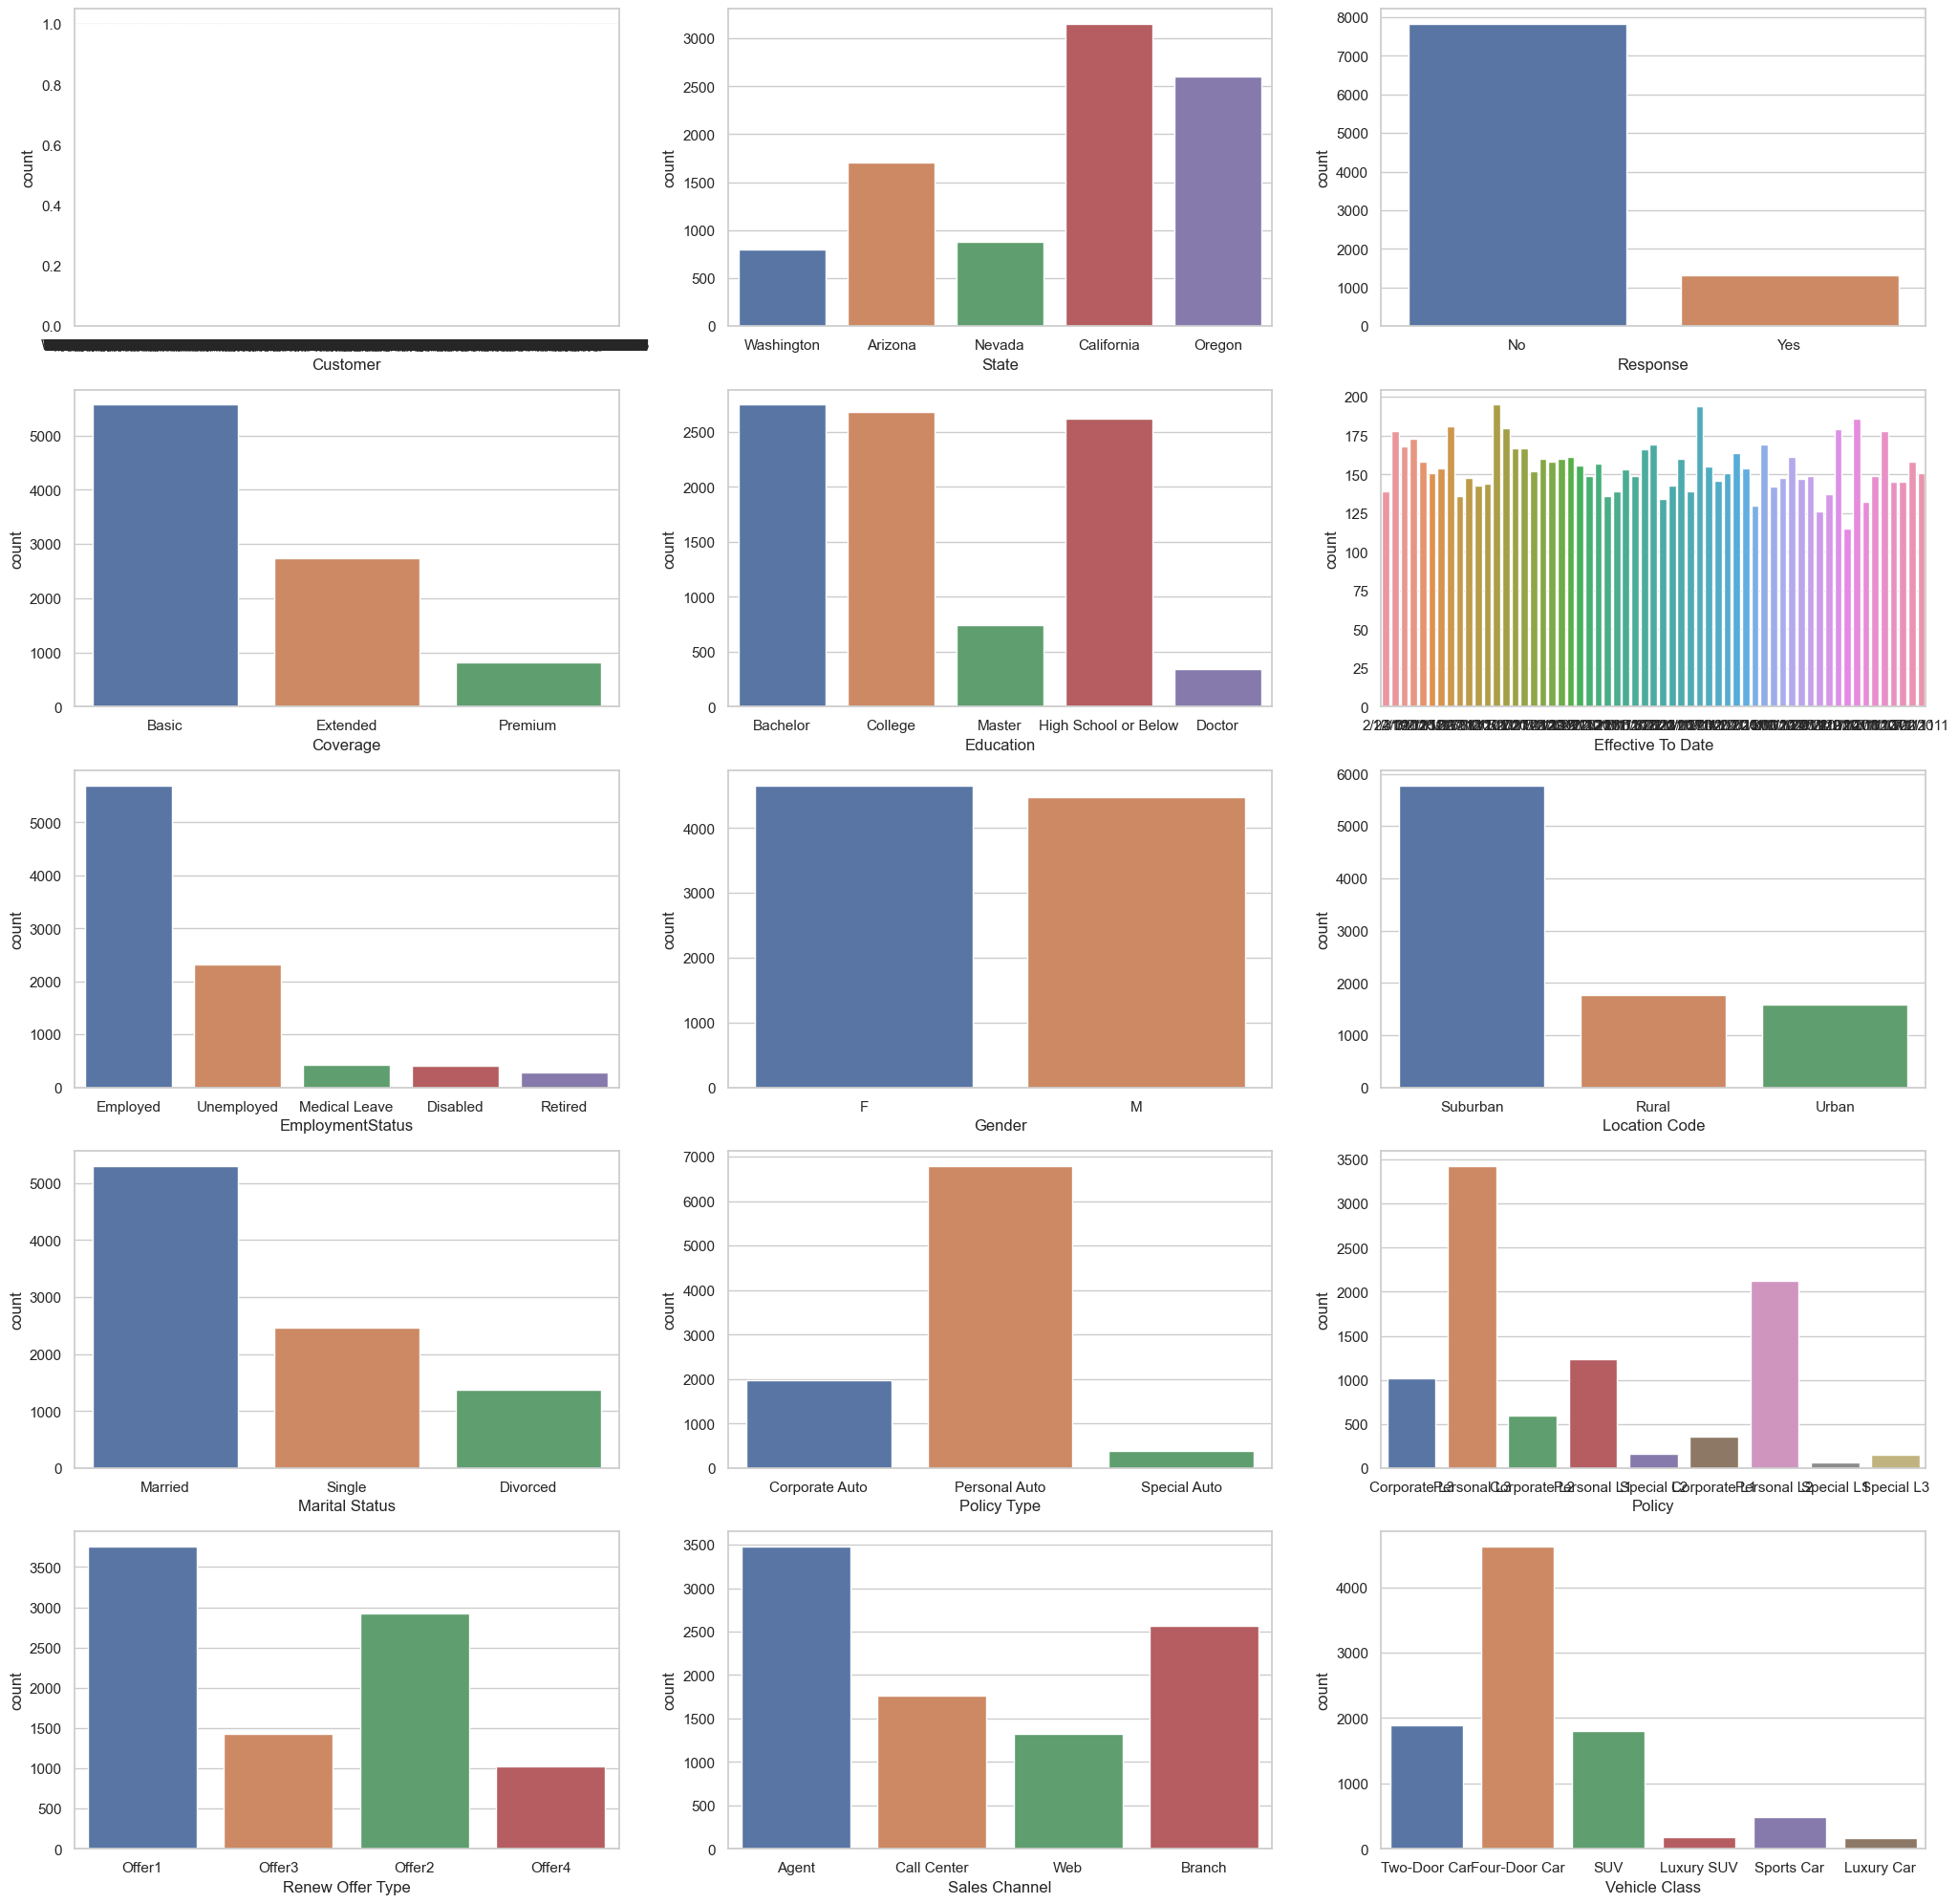

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,25))
for i,j in zip(df.select_dtypes("object").columns.to_list(),list(range(1,16))):
    plt.subplot(5,3,j)
    sns.countplot(x=i,data=df)
plt.show()

### Some of the insights
#### 1. Majority of the Customers are from California and Oregon followed by Arizona, Nevada State and Washington
#### 2. Dataset contains males and females in almost equal proportion
#### 3. Majority of the customers are from suburban location
#### 4. Majority of the customers are from personal Auto policy type
#### 5. Majority of the customers are employed
#### 6. Majority of the customers have taken Basic coverage followed by extended coverage and Permium Coverage
#### 7. Majority of the sale has happened Agent and Branch

In [11]:
#sns.set(style="whitegrid")
#plt.figure(figsize=(15,10))
#df.select_dtypes(exclude="object").plot(kind="density", subplots=True, sharex=False, sharey=True, layout=(3,3),
#                                        figsize=(15,15), grid=False)
#plt.show()

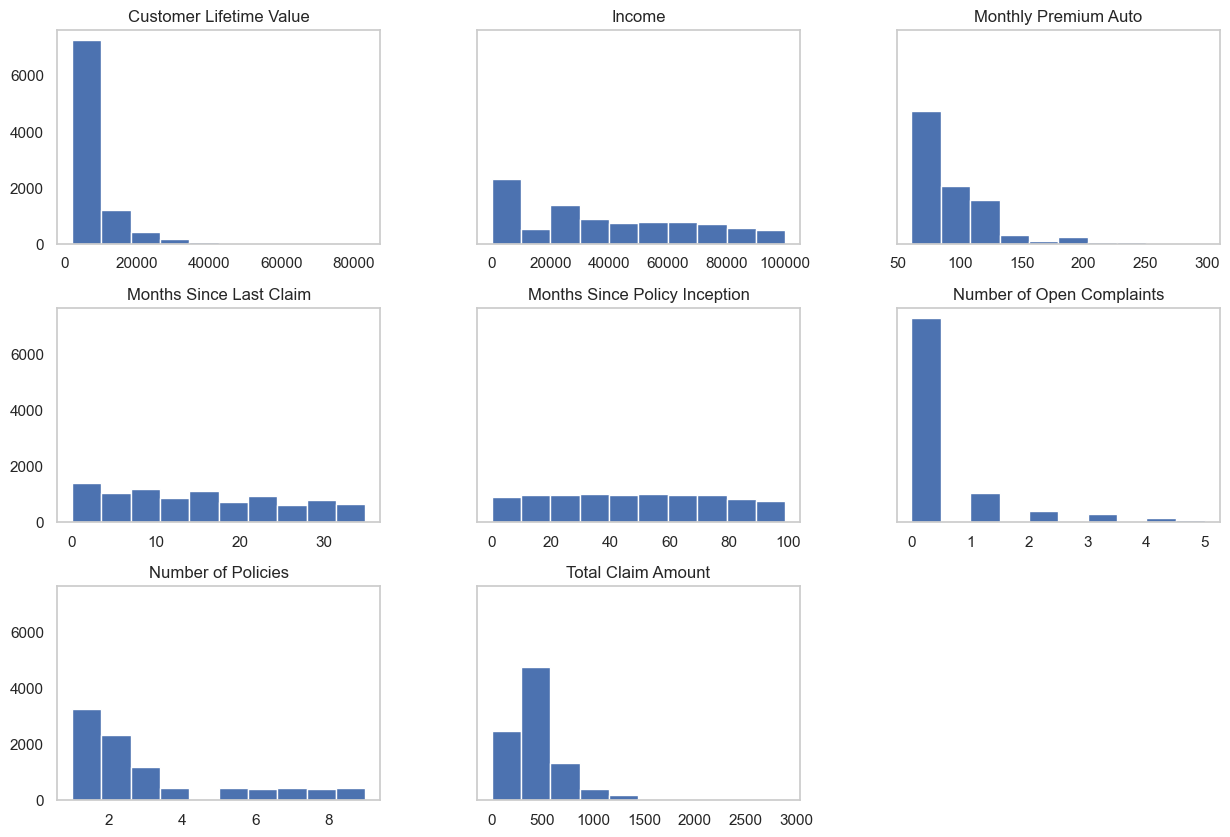

In [12]:
df.select_dtypes(exclude="object").hist(sharex=False, sharey=True, layout=(3,3),
                                        figsize=(15,10), grid=False)
plt.show()

In [13]:
df.skew()

Customer Lifetime Value          3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64

#### All the columns are positively skewed. Highest skweness is present in Customer Lifetime Value, Monthly Premium Auto, and
#### number of Open Complaints columns whereas lowest skewness is present in Months Since Policy Inception

### Bivariate Analysis

In [14]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

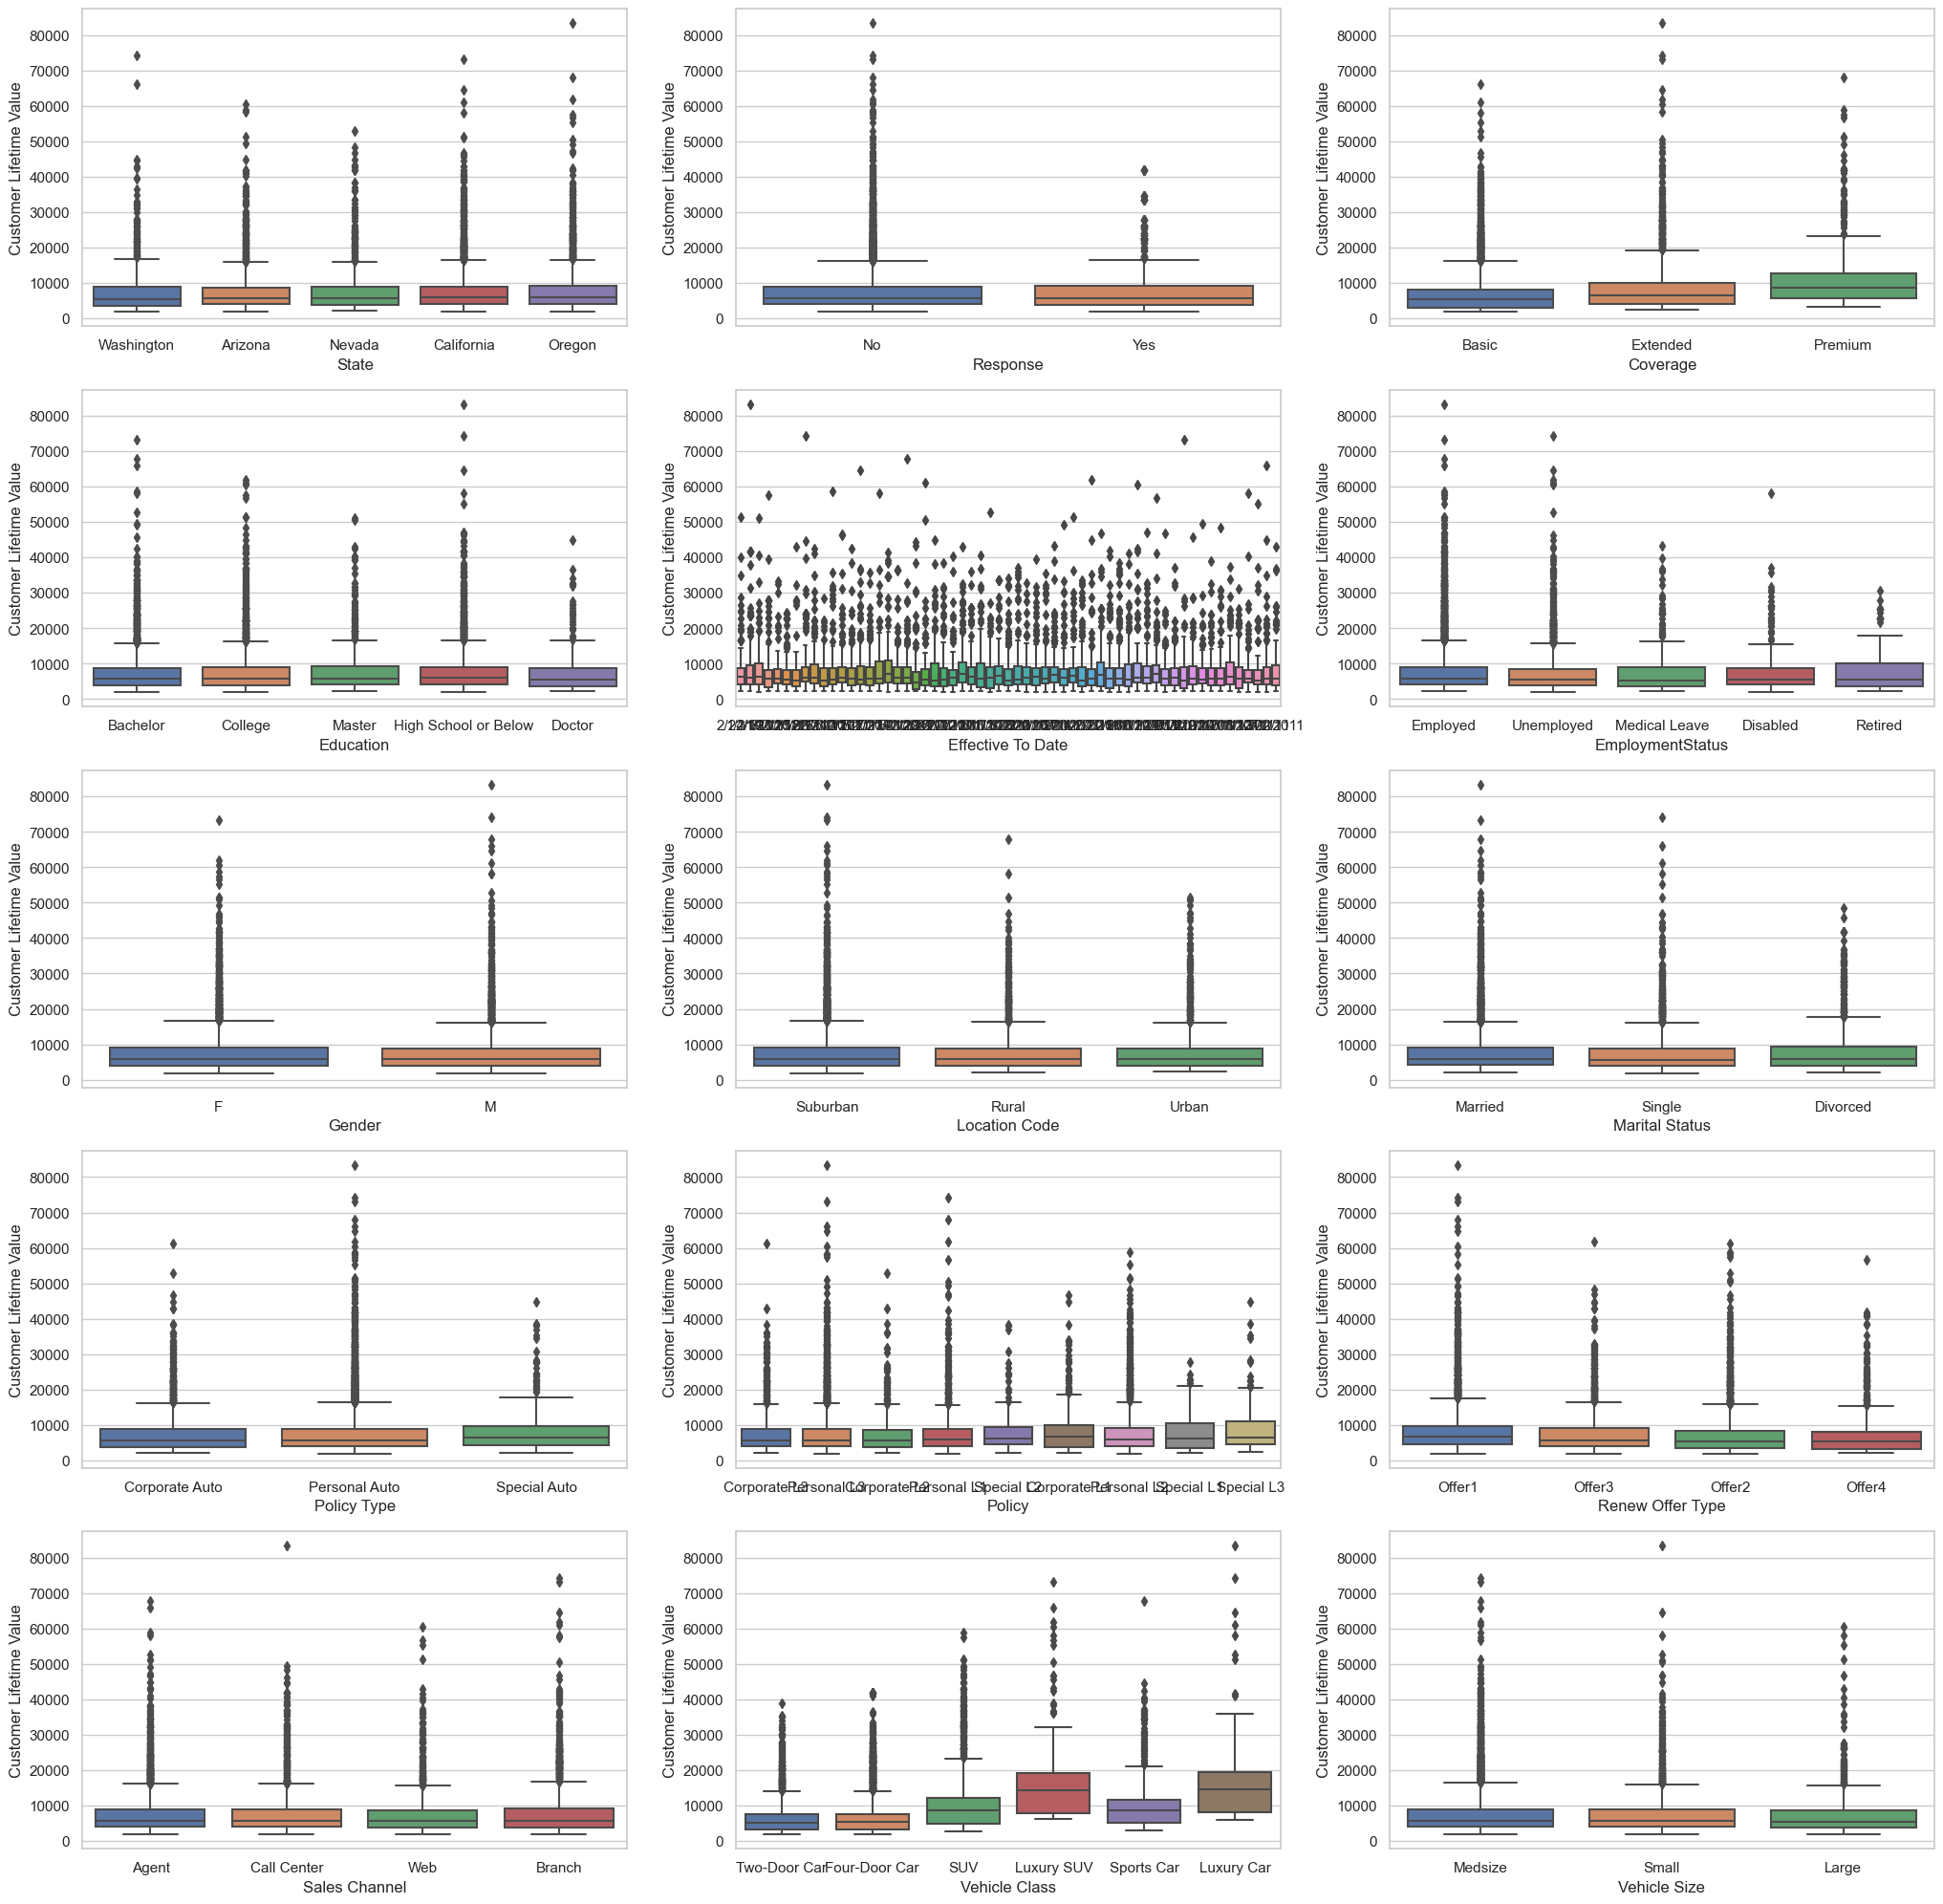

In [15]:
plt.figure(figsize=(25,25))
for i,j in zip(df.drop(columns=["Customer"]).select_dtypes("object").columns.to_list(),list(range(1,16))):
    plt.subplot(5,3,j)
    sns.boxplot(x=i,y="Customer Lifetime Value", data=df)
plt.show()

### Insights
#### Customers having Premium coverage have slightly higher CLV as compared basic and extended coverage
#### Customers that have taken insurance for Luxury cars have higher CLV compared to other insurance for other types of cars 

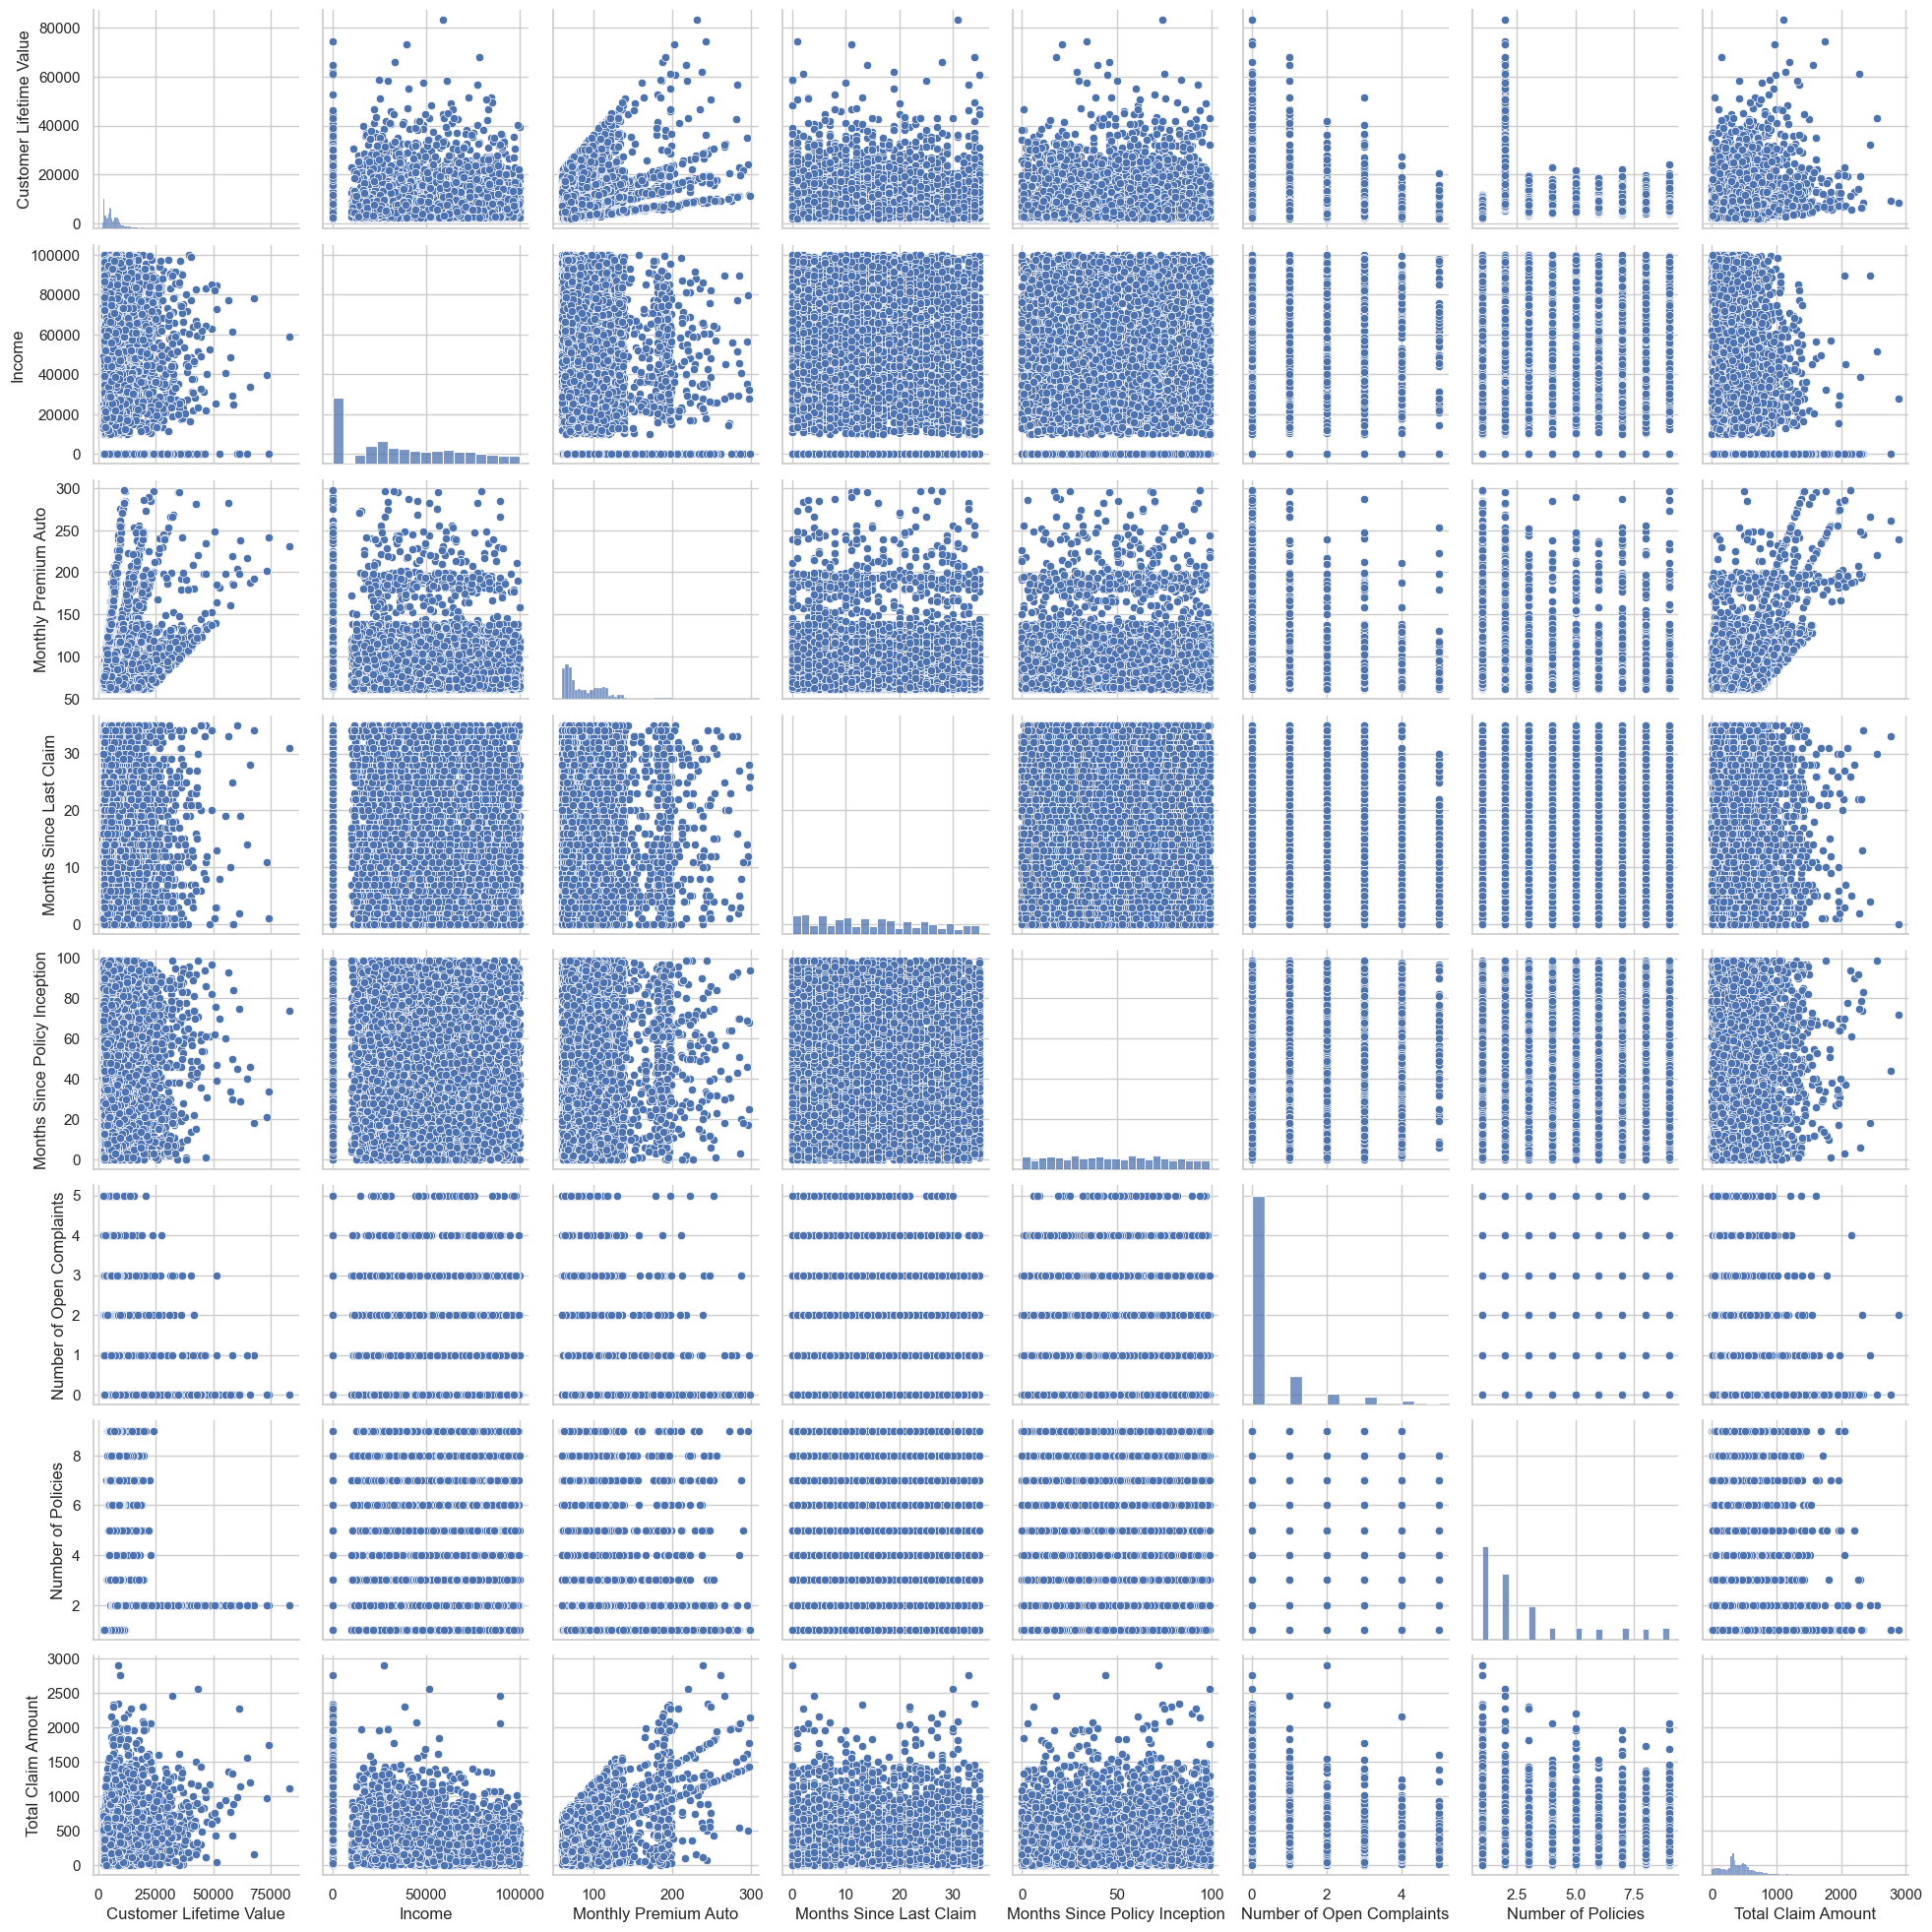

In [16]:
sns.pairplot(data=df)
plt.show()

#### It seems Monthly premium is directly proportional to CLV

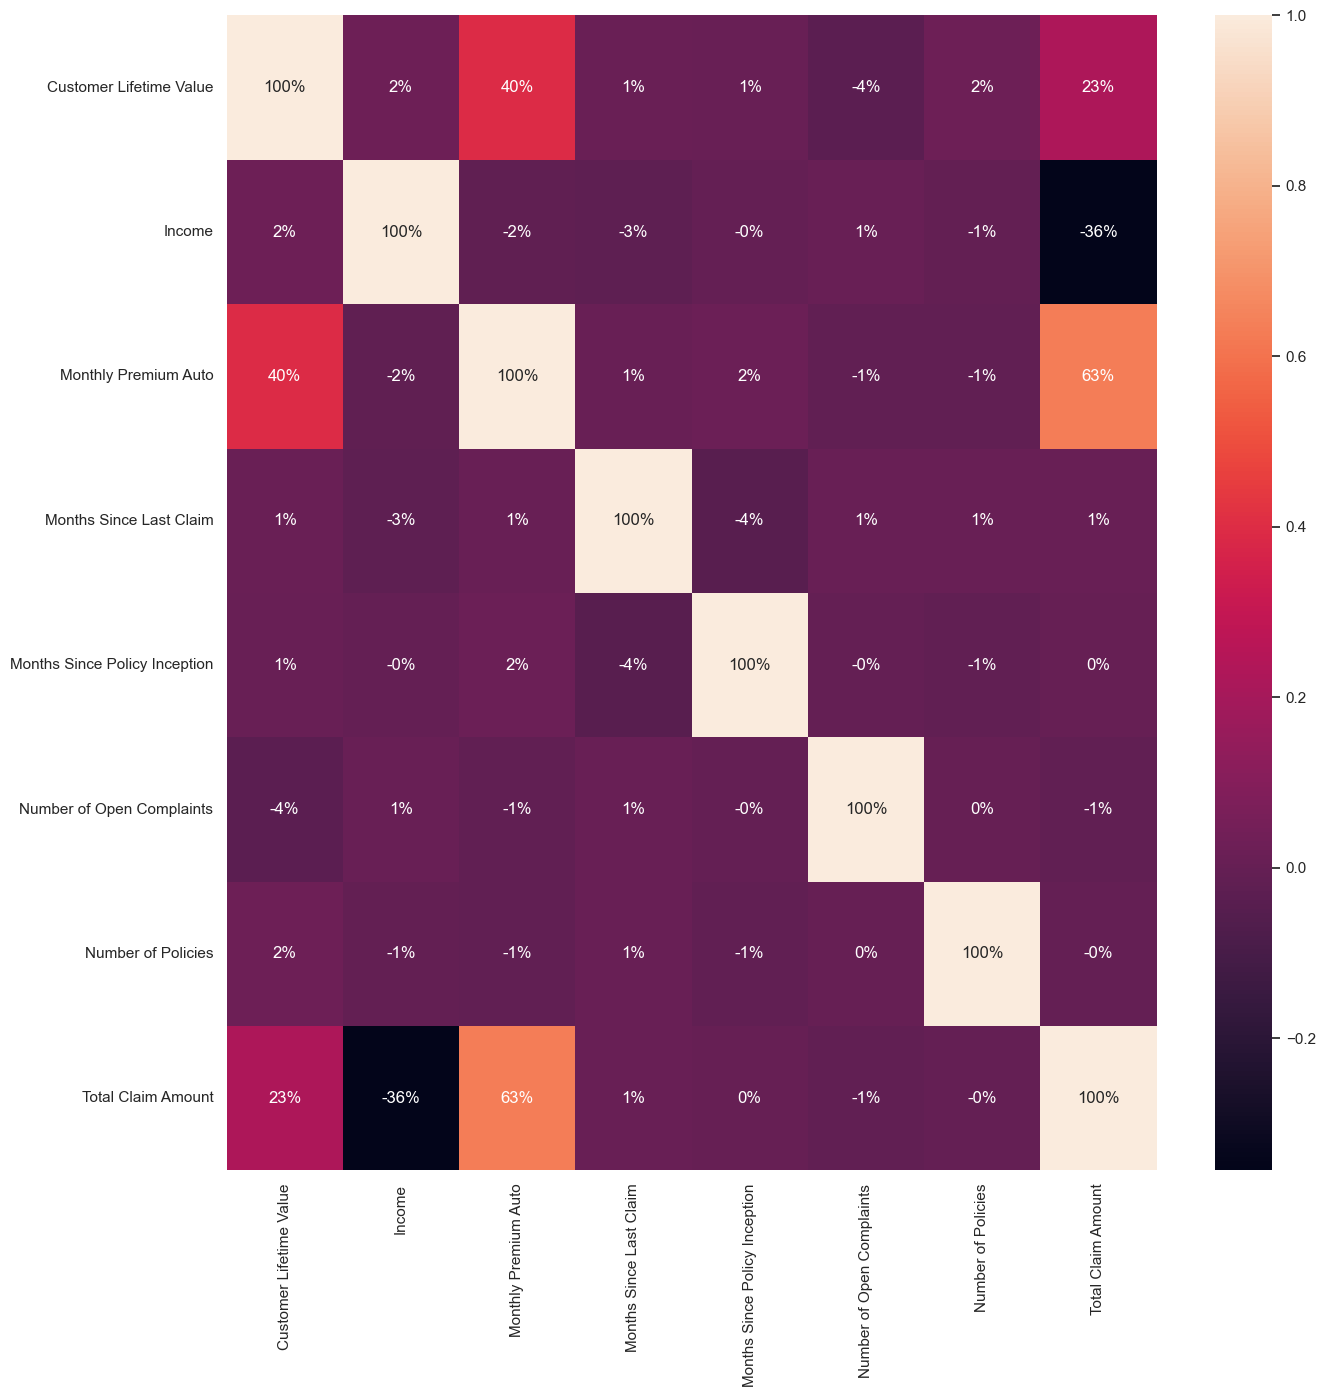

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".0%")
plt.show()

#### There is moderate relationship between Monthly premium Auto and Total Claim amount. 
#### It seems these two columns are moderately correlated to each other
#### Other than this, we can't see good relationship between any other two columns

In [18]:
# Convert data type of "Effective To Date" to Date column
df["Effective To Date"]=pd.to_datetime(df["Effective To Date"])

## Machine Learning Approach 1

In [19]:
df.sample()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
3557,QO16222,California,6383.611136,No,Basic,College,2011-02-27,Unemployed,F,0,Suburban,Single,196,13,74,2,1,Personal Auto,Personal L3,Offer2,Call Center,2327.166394,Luxury SUV,Small


In [20]:
df.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [21]:
clv=df.copy()

In [22]:
# Removing Irrelevant column Customer
clv.drop(columns=["Customer"],inplace=True)

In [23]:
# Applying label encoding to Object columns
le=LabelEncoder()
clv = clv.apply(lambda col: le.fit_transform(col) if col.dtype=="O" else col)

In [24]:
clv.sample(10)

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
517,0,4443.736209,0,2,0,2011-01-01,1,1,46384,0,1,113,33,93,0,1,0,0,1,3,251.774574,0,1
1737,0,2867.312197,1,1,0,2011-03-01,3,0,23376,1,0,78,19,18,0,1,1,3,1,2,374.400000,0,1
6066,1,12564.067750,0,0,2,2011-01-14,4,1,0,1,1,68,15,52,0,2,1,5,1,3,326.400000,0,1
2711,1,4759.664624,0,1,1,2011-01-24,4,1,0,1,2,81,10,80,3,3,1,5,0,0,388.800000,0,1
3776,0,13727.799720,1,1,1,2011-08-01,4,1,0,1,2,126,12,4,0,2,1,4,0,0,604.800000,3,1
6302,1,2477.708203,0,0,0,2011-02-14,1,0,44280,0,1,62,25,3,0,1,0,2,3,2,130.298883,5,1
2829,1,2435.535995,0,0,0,2011-01-27,1,0,40921,0,1,62,0,50,2,1,0,1,2,0,10.560419,0,1
784,3,4471.778239,0,1,1,2011-01-24,4,1,0,1,2,135,8,14,0,1,1,5,0,0,972.000000,3,1
3861,0,2839.796453,0,0,3,2011-01-25,1,0,53071,1,0,72,28,19,0,1,0,2,0,0,386.225897,0,1
8752,1,14255.230410,0,1,3,2011-01-29,1,0,31027,1,2,124,30,66,1,2,1,3,0,2,597.578875,3,1


In [25]:
clv["Month"]=clv["Effective To Date"].dt.month
clv["Year"]=clv["Effective To Date"].dt.year
clv["Day"]=clv["Effective To Date"].dt.day

In [26]:
clv.dtypes

State                                     int32
Customer Lifetime Value                 float64
Response                                  int32
Coverage                                  int32
Education                                 int32
Effective To Date                datetime64[ns]
EmploymentStatus                          int32
Gender                                    int32
Income                                    int64
Location Code                             int32
Marital Status                            int32
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                               int32
Policy                                    int32
Renew Offer Type                          int32
Sales Channel                             int32
Total Claim Amount                      

In [29]:
X=clv.drop(columns=["Customer Lifetime Value","Effective To Date"])
Y=clv["Customer Lifetime Value"]

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

### Linear Regression

In [31]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
print(lr.score(X_train,Y_train))
print(lr.score(X_test,Y_test))
print(lr.coef_)

0.16675229233314282
0.15789379467472175
[-1.00498936e+01 -4.68743175e+02 -1.20701151e+02  8.15380052e+01
 -4.43789131e+01 -1.63145111e+02  5.25169093e-03  5.08687338e+01
 -1.75850560e+02  8.12478850e+01  1.75399889e+01  3.19838456e-01
 -2.23892739e+02  5.70560436e+01  3.41469260e+02 -3.11670634e+01
 -4.59657167e+02  4.03930510e+01 -6.03045525e-01  7.45404322e+01
  3.03136396e+02  1.22860447e+00  0.00000000e+00  1.30921273e+01]


### Ridge Regression

In [32]:
rr=Ridge(alpha=0.4)
rr.fit(X_train,Y_train)
print(rr.score(X_train,Y_train))
print(rr.score(X_test,Y_test))
print(rr.coef_)

0.16675229188833007
0.157894067151938
[-1.00500508e+01 -4.68477835e+02 -1.20675585e+02  8.15331630e+01
 -4.43824227e+01 -1.63107727e+02  5.25153468e-03  5.08651902e+01
 -1.75801918e+02  8.12477540e+01  1.75399276e+01  3.20046342e-01
 -2.23874316e+02  5.70578701e+01  3.41040734e+02 -3.10533442e+01
 -4.59611416e+02  4.03941154e+01 -6.03050754e-01  7.45387327e+01
  3.03080066e+02  1.22775876e+00  0.00000000e+00  1.30915838e+01]


### Lasso Regression

In [33]:
lar=Lasso(alpha=0.3)
lar.fit(X_train,Y_train)
print(lar.score(X_train,Y_train))
print(lar.score(X_test,Y_test))
print(lar.coef_)

0.16675217259553432
0.15789280279593199
[-9.88366612e+00 -4.65993853e+02 -1.19797767e+02  8.13457261e+01
 -4.42247025e+01 -1.62007614e+02  5.25943960e-03  5.00683454e+01
 -1.74946697e+02  8.12385711e+01  1.75335949e+01  3.22167650e-01
 -2.23541350e+02  5.70338205e+01  3.34020282e+02 -2.90877983e+01
 -4.59160843e+02  4.01824058e+01 -6.02560260e-01  7.44727377e+01
  3.02201652e+02  1.14682198e+00  0.00000000e+00  1.30674030e+01]


### K Nearest Neighbours

In [34]:
knn=KNeighborsRegressor()
#knn.fit(X_train,Y_train)
#print(knn.score(X_train,Y_train))
#print(knn.score(X_test,Y_test))

In [35]:
### n_neighbors, weights, uniform, distance
n_neighbors=range(5,50)
weights=["uniform","distance"]
knn_dict=dict(n_neighbors=n_neighbors,weights=weights)
grid_knn=GridSearchCV(knn,param_grid=knn_dict,cv=10)

In [36]:
grid_knn.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 50),
                         'weights': ['uniform', 'distance']})

In [37]:
best_n_neighbors=grid_knn.best_estimator_.get_params()["n_neighbors"]
best_weights=grid_knn.best_estimator_.get_params()["weights"]
print(best_n_neighbors)
print(best_weights)
KNN=KNeighborsRegressor(n_neighbors=best_n_neighbors, weights=best_weights)
KNN.fit(X_train,Y_train)
print(KNN.score(X_train,Y_train))
print(KNN.score(X_test,Y_test))

45
distance
0.9999999999943022
0.1339736747811905


### Support Vecor Machine

In [38]:
svm=SVR()
#svm.fit(X_train,Y_train)
#print(svm.score(X_train,Y_train))
#print(svm.score(X_test,Y_test))

In [39]:
kernel=['rbf', 'sigmoid']
C=[50,10,0.1,1.0,0.01]
gamma=["scale"]
svm_dict=dict(kernel=kernel,C=C)
svm_grid=GridSearchCV(svm,param_grid=svm_dict,cv=10)

In [40]:
svm_grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [50, 10, 0.1, 1.0, 0.01],
                         'kernel': ['rbf', 'sigmoid']})

In [41]:
best_kernel=svm_grid.best_estimator_.get_params()["kernel"]
best_C=svm_grid.best_estimator_.get_params()["C"]
best_gamma=svm_grid.best_estimator_.get_params()["gamma"]
print(best_kernel,best_C,best_gamma)
SVM=SVR(kernel=best_kernel, C=best_C, gamma=best_gamma)
SVM.fit(X_train,Y_train)
print(SVM.score(X_train,Y_train))
print(SVM.score(X_test,Y_test))

sigmoid 0.01 scale
-0.10534294079731188
-0.10572177507827174


### Decision Tree

In [42]:
dtr=DecisionTreeRegressor()
#dtr.fit(X_train,Y_train)
#print(dtr.score(X_train,Y_train))
#print(dtr.score(X_test,Y_test))

In [43]:
criterion=["squared_error","friedman_mse", "absolute_error","poisson"]
max_depth=list(range(5,50))
dtr_dict=dict(criterion=criterion,max_depth=max_depth)
dtr_grid=GridSearchCV(dtr,param_grid=dtr_dict,cv=10)

In [44]:
dtr_grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                       26, 27, 28, 29, 30, 31, 32, 33, 34, ...]})

In [45]:
best_criterion=dtr_grid.best_estimator_.get_params()["criterion"]
best_max_depth=dtr_grid.best_estimator_.get_params()["max_depth"]
print(best_criterion,best_max_depth)
DTR=DecisionTreeRegressor(criterion=best_criterion,max_depth=best_max_depth)
DTR.fit(X_train,Y_train)
print(DTR.score(X_train,Y_train))
print(DTR.score(X_test,Y_test))

poisson 5
0.7000213066636638
0.6065830849224967


### Bagging

In [46]:
bgr=BaggingRegressor()
#bgr.fit(X_train,Y_train)
#print(bgr.score(X_train,Y_train))
#print(bgr.score(X_test,Y_test))

In [47]:
estimator =[DTR]
n_estimators=list(range(1,100))
bgr_dict=dict(estimator=estimator,n_estimators=n_estimators)
bgr_grid=GridSearchCV(bgr,param_grid=bgr_dict,cv=10)
bgr_grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(),
             param_grid={'estimator': [DecisionTreeRegressor(criterion='poisson',
                                                             max_depth=5)],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [48]:
#best_criterion=svm_grid.best_estimator_.get_params()["criterion"]
best_n_estimators=bgr_grid.best_estimator_.get_params()["n_estimators"]
print(best_n_estimators)
BGR=BaggingRegressor(estimator=DTR, n_estimators=best_n_estimators)
BGR.fit(X_train,Y_train)
print(BGR.score(X_train,Y_train))
print(BGR.score(X_test,Y_test))

41
0.7123716428255957
0.6635414430734978


### Gradient Boosting

In [49]:
gbr=GradientBoostingRegressor()
#gbr.fit(X_train,Y_train)
#print(gbr.score(X_train,Y_train))
#print(gbr.score(X_test,Y_test))

In [50]:
gbr_n_estimators=list(range(1,100))
gbr_dict=dict(n_estimators=gbr_n_estimators)
gbr_grid=GridSearchCV(gbr,param_grid=gbr_dict,cv=10)
gbr_grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [51]:
gbr_best_n_estimators=gbr_grid.best_estimator_.get_params()["n_estimators"]
print(gbr_best_n_estimators)
GBR=GradientBoostingRegressor(n_estimators=gbr_best_n_estimators)
GBR.fit(X_train,Y_train)
print(GBR.score(X_train,Y_train))
print(GBR.score(X_test,Y_test))

87
0.7351514341372836
0.6741125385737377


### Ada Boosting

In [52]:
abr=AdaBoostRegressor()
#abr.fit(X_train,Y_train)
#print(abr.score(X_train,Y_train))
#print(abr.score(X_test,Y_test))

In [53]:
abr_n_estimators=list(range(1,100))
abr_dict=dict(estimator=[DTR],n_estimators=abr_n_estimators)
abr_grid=GridSearchCV(abr,param_grid=abr_dict,cv=10)
abr_grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(),
             param_grid={'estimator': [DecisionTreeRegressor(criterion='poisson',
                                                             max_depth=5)],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [54]:
best_abr_n_estimators=abr_grid.best_estimator_.get_params()["n_estimators"]
print(best_abr_n_estimators)
ABR=AdaBoostRegressor(estimator=DTR,n_estimators=best_abr_n_estimators)
ABR.fit(X_train,Y_train)
print(ABR.score(X_train,Y_train))
print(ABR.score(X_test,Y_test))

3
0.6886048976792578
0.6452210394601918


### XG Boosting

In [55]:
xgr=XGBRegressor()
#xgr.fit(X_train,Y_train)
#print(xgr.score(X_train,Y_train))
#print(xgr.score(X_test,Y_test))

In [56]:
xgr_n_estimators=list(range(1,100))
xgr_dict=dict(n_estimators=xgr_n_estimators)
xgr_grid=GridSearchCV(xgr,param_grid=xgr_dict,cv=10)
xgr_grid.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [57]:
xgr_best_n_estimators=xgr_grid.best_estimator_.get_params()["n_estimators"]
print(best_abr_n_estimators)
XGR=XGBRegressor(n_estimators=xgr_best_n_estimators)
XGR.fit(X_train,Y_train)
print(XGR.score(X_train,Y_train))
print(XGR.score(X_test,Y_test))

3
0.8348749502425125
0.654675513843815


### Random Forest

In [58]:
rfr=RandomForestRegressor()
#rfr.fit(X_train,Y_train)
#print(rfr.score(X_train,Y_train))
#print(rfr.score(X_test,Y_test))

In [59]:
#rfr_n_estimators=list(range(1,100))
#rfc_max_features=list(range(7,18))
#rfr_dict=dict(n_estimators=rfr_n_estimators,max_features=rfc_max_features)
#rfr_grid=GridSearchCV(rfr,param_grid=rfr_dict,cv=10)
#rfr_grid.fit(X_train,Y_train)
### Couldn't get output as it was taking long time to run

#### In Approach 1, we're getting best score using bagging technique. Using this technique, we're getting below scores:
#### Train Data Score: 71.23%
#### Test Data Score: 66.34%

### Machine Learning Approach 2 --> Applying Standardization

In [60]:
st=StandardScaler()
X_scaled=st.fit_transform(X)

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3)

### Linear Regression

In [62]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
print(lr.score(X_train,Y_train))
print(lr.score(X_test,Y_test))
print(lr.coef_)

0.17653766145203587
0.13762667832540842
[  59.20403311 -191.36784584 -161.96567631  118.42661267 -238.57835749
  -83.18013248   40.54238625   45.92386201 -122.94750159 2858.32055682
  167.41456436 -101.18694765 -202.73257343  151.63706522  322.85242174
 -146.92363369 -339.02281488  -12.37103583 -138.33699607  166.87225937
   95.50585447  -58.58238618    0.           58.41031596]


### Ridge Regression

In [63]:
rr=Ridge(alpha=0.4)
rr.fit(X_train,Y_train)
print(rr.score(X_train,Y_train))
print(rr.score(X_test,Y_test))
print(rr.coef_)

0.1765376596303636
0.13762778892208383
[  59.20149647 -191.35876968 -161.83956297  118.42020916 -238.59948923
  -83.19518612   40.61929155   45.84828976 -122.96688716 2857.89277229
  167.40554566 -101.17129299 -202.72127253  151.62592708  322.71725785
 -146.79372045 -339.01088342  -12.37336504 -138.03130846  166.90650941
   95.48499463  -58.57938706    0.           58.40880114]


### Lasso Regression

In [64]:
lar=Lasso(alpha=0.3)
lar.fit(X_train,Y_train)
print(lar.score(X_train,Y_train))
print(lar.score(X_test,Y_test))
print(lar.coef_)

0.17653757858943042
0.13764940487812383
[  58.89331764 -190.96353967 -161.37922403  118.13189342 -238.67750646
  -82.96985129   40.5190269    45.35960152 -122.7144355  2857.13060726
  167.111841   -100.8363006  -202.43049864  151.38012385  320.268819
 -144.32920862 -338.6462419   -12.06574369 -137.21743872  166.67378114
   95.19367474  -58.42371829    0.           58.22361408]


### K Nearest Neighbours

In [65]:
knn=KNeighborsRegressor()
#knn.fit(X_train,Y_train)
#print(knn.score(X_train,Y_train))
#print(knn.score(X_test,Y_test))

In [66]:
### n_neighbors, weights, uniform, distance
n_neighbors=range(5,50)
weights=["uniform","distance"]
knn_dict=dict(n_neighbors=n_neighbors,weights=weights)
grid_knn=GridSearchCV(knn,param_grid=knn_dict,cv=10)

In [67]:
grid_knn.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 50),
                         'weights': ['uniform', 'distance']})

In [68]:
best_n_neighbors=grid_knn.best_estimator_.get_params()["n_neighbors"]
best_weights=grid_knn.best_estimator_.get_params()["weights"]
print(best_n_neighbors)
print(best_weights)
KNN=KNeighborsRegressor(n_neighbors=best_n_neighbors, weights=best_weights)
KNN.fit(X_train,Y_train)
print(KNN.score(X_train,Y_train))
print(KNN.score(X_test,Y_test))

20
distance
0.999999999999944
0.16311877750140402


### Support Vector Machine

In [69]:
svm=SVR()
#svm.fit(X_train,Y_train)
#print(svm.score(X_train,Y_train))
#print(svm.score(X_test,Y_test))

In [70]:
kernel=['rbf', 'sigmoid']
C=[50,10,0.1,1.0,0.01]
gamma=["scale"]
svm_dict=dict(kernel=kernel,C=C)
svm_grid=GridSearchCV(svm,param_grid=svm_dict,cv=10)

In [71]:
svm_grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [50, 10, 0.1, 1.0, 0.01],
                         'kernel': ['rbf', 'sigmoid']})

In [72]:
best_kernel=svm_grid.best_estimator_.get_params()["kernel"]
best_C=svm_grid.best_estimator_.get_params()["C"]
best_gamma=svm_grid.best_estimator_.get_params()["gamma"]
print(best_kernel,best_C,best_gamma)
SVM=SVR(kernel=best_kernel, C=best_C, gamma=best_gamma)
SVM.fit(X_train,Y_train)
print(SVM.score(X_train,Y_train))
print(SVM.score(X_test,Y_test))

sigmoid 50 scale
0.03255826500001158
0.011857677097800834


### Decision Tree

In [73]:
dtr=DecisionTreeRegressor()
#dtr.fit(X_train,Y_train)
#print(dtr.score(X_train,Y_train))
#print(dtr.score(X_test,Y_test))

In [74]:
criterion=["squared_error","friedman_mse", "absolute_error","poisson"]
max_depth=list(range(5,50))
dtr_dict=dict(criterion=criterion,max_depth=max_depth)
dtr_grid=GridSearchCV(dtr,param_grid=dtr_dict,cv=10)

In [75]:
dtr_grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                       26, 27, 28, 29, 30, 31, 32, 33, 34, ...]})

In [76]:
best_criterion=dtr_grid.best_estimator_.get_params()["criterion"]
best_max_depth=dtr_grid.best_estimator_.get_params()["max_depth"]
print(best_criterion,best_max_depth)
DTR=DecisionTreeRegressor(criterion=best_criterion,max_depth=best_max_depth)
DTR.fit(X_train,Y_train)
print(DTR.score(X_train,Y_train))
print(DTR.score(X_test,Y_test))

squared_error 5
0.7013890360046224
0.6465898772462602


### Bagging

In [77]:
bgr=BaggingRegressor()
#bgr.fit(X_train,Y_train)
#print(bgr.score(X_train,Y_train))
#print(bgr.score(X_test,Y_test))

In [78]:
estimator =[DTR]
n_estimators=list(range(1,100))
bgr_dict=dict(estimator=estimator,n_estimators=n_estimators)
bgr_grid=GridSearchCV(bgr,param_grid=bgr_dict,cv=10)
bgr_grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(),
             param_grid={'estimator': [DecisionTreeRegressor(max_depth=5)],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [79]:
#best_criterion=svm_grid.best_estimator_.get_params()["criterion"]
best_n_estimators=bgr_grid.best_estimator_.get_params()["n_estimators"]
print(best_n_estimators)
BGR=BaggingRegressor(estimator=DTR, n_estimators=best_n_estimators)
BGR.fit(X_train,Y_train)
print(BGR.score(X_train,Y_train))
print(BGR.score(X_test,Y_test))

27
0.7148424760478387
0.662196113143011


### Gradient Boosting

In [80]:
gbr=GradientBoostingRegressor()
#gbr.fit(X_train,Y_train)
#print(gbr.score(X_train,Y_train))
#print(gbr.score(X_test,Y_test))

In [81]:
gbr_n_estimators=list(range(1,100))
gbr_dict=dict(n_estimators=gbr_n_estimators)
gbr_grid=GridSearchCV(gbr,param_grid=gbr_dict,cv=10)
gbr_grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [82]:
gbr_best_n_estimators=gbr_grid.best_estimator_.get_params()["n_estimators"]
print(gbr_best_n_estimators)
GBR=GradientBoostingRegressor(n_estimators=gbr_best_n_estimators)
GBR.fit(X_train,Y_train)
print(GBR.score(X_train,Y_train))
print(GBR.score(X_test,Y_test))

66
0.7323266222535901
0.6650185769768746


### Ada Boosting

In [83]:
abr=AdaBoostRegressor()
#abr.fit(X_train,Y_train)
#print(abr.score(X_train,Y_train))
#print(abr.score(X_test,Y_test))

In [84]:
abr_n_estimators=list(range(1,100))
abr_dict=dict(estimator=[DTR],n_estimators=abr_n_estimators)
abr_grid=GridSearchCV(abr,param_grid=abr_dict,cv=10)
abr_grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(),
             param_grid={'estimator': [DecisionTreeRegressor(max_depth=5)],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [85]:
best_abr_n_estimators=abr_grid.best_estimator_.get_params()["n_estimators"]
print(best_abr_n_estimators)
ABR=AdaBoostRegressor(estimator=DTR,n_estimators=best_abr_n_estimators)
ABR.fit(X_train,Y_train)
print(ABR.score(X_train,Y_train))
print(ABR.score(X_test,Y_test))

2
0.6864849832113566
0.6625076958103899


### XG Boosting

In [86]:
xgr=XGBRegressor()
#xgr.fit(X_train,Y_train)
#print(xgr.score(X_train,Y_train))
#print(xgr.score(X_test,Y_test))

In [87]:
xgr_n_estimators=list(range(1,100))
xgr_dict=dict(n_estimators=xgr_n_estimators)
xgr_grid=GridSearchCV(xgr,param_grid=xgr_dict,cv=10)
xgr_grid.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [88]:
xgr_best_n_estimators=xgr_grid.best_estimator_.get_params()["n_estimators"]
print(best_abr_n_estimators)
XGR=XGBRegressor(n_estimators=xgr_best_n_estimators)
XGR.fit(X_train,Y_train)
print(XGR.score(X_train,Y_train))
print(XGR.score(X_test,Y_test))

2
0.784432653855061
0.6678491564334119


### Random Forest

In [89]:
rfr=RandomForestRegressor()
#rfr.fit(X_train,Y_train)
#print(rfr.score(X_train,Y_train))
#print(rfr.score(X_test,Y_test))

In [90]:
#rfr_n_estimators=list(range(1,100))
#rfc_max_features=list(range(7,18))
#rfr_dict=dict(n_estimators=rfr_n_estimators,max_features=rfc_max_features)
#rfr_grid=GridSearchCV(rfr,param_grid=rfr_dict,cv=10)
#rfr_grid.fit(X_train,Y_train)
### Couldn't get output as it was taking long time to run

### By applying standardization, we couldn't see much improvement in the model.In this approach also, we're  
### getting best score using Bagging technique.
### Train data score: 0.71.49%
### Test Data score: 0.66.21%